# Analysis of kinesin walking

(c) 2017 Justin Bois. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

*This exercise was generated from a Jupyter notebook. You can download the notebook [here](kinesin_walking_in_class.ipynb).*

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load in times, skipping first row
t = np.loadtxt('yildiz_step_times.csv', skiprows=1)

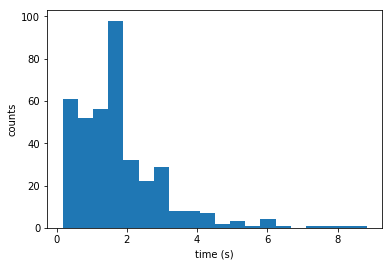

In [9]:
# Plot a histogram of waiting times
_ = plt.hist(t, bins=20)
plt.xlabel('time (s)')
plt.ylabel('counts');

In [11]:
def ecdf(data):
    """Compute x and y values for plotting the ECDF.
    
    Parameters
    ----------
    data : array_like
        One-dimensional array of data from which to compute ECDF.
        
    Returns
    -------
    x : ndarray
        1D array of x-values to plot
    y : ndarray
        1D array of y-values to plot
        
    Example
    -------
    >>> import matplotlib.pyplot as plt
    >>> x, y = ecdf(data)
    >>> plt.plot(x, y, '.')
    """
    # x-values are sorted data set
    x = np.sort(data)
    
    # y-values go from 1/n to 1
    y = np.arange(1, len(data)+1) / len(data)
    
    return x, y

(0, 9)

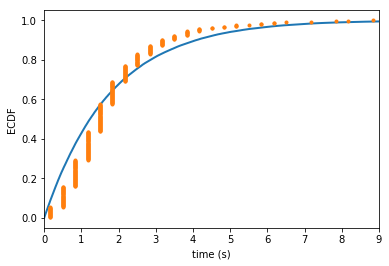

In [26]:
# Generate x and y values for ECDF
x, y = ecdf(t)

# Theoretical tau under the Exponential distribution
tau = np.mean(t)

# Draw 100,000 samples out of the exponential distribution
t_samples = np.random.exponential(tau, size=100000)

# Make x and y values for plotting
x_exp, y_exp = ecdf(t_samples)

# Plot theoretical CDF
plt.plot(x_exp, y_exp, linewidth=2)

# Plot ECDF as dots
plt.plot(x, y, '.')
plt.xlabel('time (s)')
plt.ylabel('ECDF')
plt.xlim(0, 9)

In [27]:
# Time for one of the processes to arrive in two-step model
tau2 = np.mean(t) / 2

# Draw 100,000 samples out of the exponential distribution
t1 = np.random.exponential(tau2, size=100000)

# Draw 100,000 samples for the waiting for the second step
t2 = np.random.exponential(tau2, size=100000)

t_double = t1 + t2

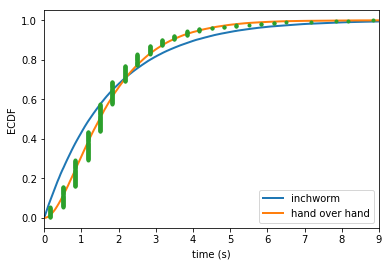

In [29]:
# Generate x and y values for ECDF
x, y = ecdf(t)

# Theoretical tau under the Exponential distribution
tau = np.mean(t)

# Draw 100,000 samples out of the exponential distribution
t_samples = np.random.exponential(tau, size=100000)

# Make x and y values for plotting
x_exp, y_exp = ecdf(t_samples)

# Plot theoretical CDF
plt.plot(x_exp, y_exp, linewidth=2, label='inchworm')

# Make x and y for plotting double
x_double, y_double = ecdf(t_double)

# Plot theoretical CDF for two-step model
plt.plot(x_double, y_double, linewidth=2, label='hand over hand')

# Plot ECDF as dots
plt.plot(x, y, '.')
plt.xlabel('time (s)')
plt.ylabel('ECDF')
plt.xlim(0, 9)
plt.legend(loc='lower right');